<a href="https://colab.research.google.com/github/AndresLunaH/Desaf-o-Telecom-X/blob/main/Desafio_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio Telecom X

Para poder ejecutar las celdas correctamente y visualizar los graficos, es necesario hacerlo de forma secuencial, partiendo desde la importancion de datos.
Cada sección puede ejecutarse de forma independiente a la otra, en caso de algun problema intente ejecutar nuevamente la Importancion de datos, o las celdas anteriores a la seccion.
Este Colab fue realizado para el desafio de Alura Latam, mas información en el siguiente enlace Desafío Telecom X

# Extracción

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

clientes = pd.read_json(url)

clientes_normalizado_customer = pd.json_normalize(clientes['customer'])
clientes_normalizado_phone = pd.json_normalize(clientes['phone'])
clientes_normalizado_internet = pd.json_normalize(clientes['internet'])
clientes_normalizado_account = pd.json_normalize(clientes['account'])

'''
clientes_normalizado_customer.info()
clientes_normalizado_phone.info()
clientes_normalizado_internet.info()
clientes_normalizado_account.info()
'''

clientes_normalizado = clientes.drop(columns=['customer', 'phone', 'internet', 'account'])

clientes_normalizado = pd.concat([clientes_normalizado, clientes_normalizado_customer, clientes_normalizado_phone, clientes_normalizado_internet, clientes_normalizado_account], axis=1)

clientes_normalizado.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Apendice
**customerID:** número de identificación único de cada cliente

**Churn**: si el cliente dejó o no la empresa

**gender**: género (masculino y femenino)

**SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

**Partner:** si el cliente tiene o no una pareja
**Dependents:** si el cliente tiene o no dependientes
**tenure:** meses de contrato del cliente

**PhoneService:** suscripción al servicio telefónico

**MultipleLines:** suscripción a más de una línea telefónica

**InternetService:** suscripción a un proveedor de internet

**OnlineSecurity:** suscripción adicional de seguridad en línea

**OnlineBackup:** suscripción adicional de respaldo en línea

**DeviceProtection:** suscripción adicional de protección del dispositivo

**TechSupport:** suscripción adicional de soporte técnico, menor tiempo de espera

**StreamingTV:** suscripción de televisión por cable

**StreamingMovies:** suscripción de streaming de películas

**Contract:** tipo de contrato

**PaperlessBilling:** si el cliente prefiere recibir la factura en línea

**PaymentMethod:** forma de pago

**Charges.Monthly:** total de todos los servicios del cliente por mes

**Charges.Total:** total gastado por el cliente


## Transformación

In [ ]:
clientes_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Formatear Numeros Flotantes

Charges.Total y Charges.Monthly son columnas numericas.

In [ ]:
clientes_normalizado['Charges.Total'] = pd.to_numeric(clientes_normalizado['Charges.Total'],errors='coerce').round(2)

##Formatear Booleanos
El dataframe presenta multiples columnas con 2 respuestas (Yes/No) y una con 2 respuestas (1/0) para verificar si es adulto mayor.

In [ ]:

def convertir_a_booleano(df: pd.DataFrame, columnas) -> pd.DataFrame:
    """
    Convierte en varias columnas los valores "Yes" a True y "No" a False.
    Si no hay valores inesperados, transforma la columna a tipo booleano.
    Si hay valores distintos, muestra alerta y deja esos valores sin modificar.

    Parámetros:
    - df (pd.DataFrame): DataFrame de entrada.
    - columnas (str o list): Nombre(s) de columna(s) a convertir.

    Retorna:
    - pd.DataFrame: DataFrame con las columnas modificadas.
    """
    if isinstance(columnas, str):
        columnas = [columnas]

    df = df.copy()

    for col in columnas:
        if col not in df.columns:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")
            continue

        valores_no_esperados = []

        def convertir(valor):
            if valor == "Yes":
                return True
            elif valor == "No":
                return False
            else:
                valores_no_esperados.append(valor)
                return valor

        df[col] = df[col].apply(convertir)

        if valores_no_esperados:
            for v in set(valores_no_esperados):
                print(f"⚠️ Valor inesperado en la columna '{col}': '{v}' (sin cambios)")
        else:
            df[col] = df[col].astype(bool)

    return df

def convertir_1_0_a_booleano(df: pd.DataFrame, columnas) -> pd.DataFrame:
    """
    Convierte en varias columnas los valores "1" a True y "0" a False.
    Si no hay valores inesperados, transforma la columna a tipo booleano.
    Si hay valores distintos, muestra alerta y deja esos valores sin modificar.

    Parámetros:
    - df (pd.DataFrame): DataFrame de entrada.
    - columnas (str o list): Nombre(s) de columna(s) a convertir.

    Retorna:
    - pd.DataFrame: DataFrame con las columnas modificadas.
    """
    if isinstance(columnas, str):
        columnas = [columnas]

    df = df.copy()

    for col in columnas:
        if col not in df.columns:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")
            continue

        valores_no_esperados = []

        def convertir(valor):
            str_val = str(valor)
            if str_val == "1":
                return True
            elif str_val == "0":
                return False
            else:
                valores_no_esperados.append(valor)
                return valor

        df[col] = df[col].apply(convertir)

        if valores_no_esperados:
            for v in set(valores_no_esperados):
                print(f"⚠️ Valor inesperado en la columna '{col}': '{v}' (sin cambios)")
        else:
            df[col] = df[col].astype(bool)

    return df

clientes_normalizado = convertir_a_booleano(clientes_normalizado, ['Churn','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling'])
clientes_normalizado = convertir_1_0_a_booleano(clientes_normalizado, 'SeniorCitizen')
clientes_normalizado.info()

⚠️ Valor inesperado en la columna 'Churn': '' (sin cambios)
⚠️ Valor inesperado en la columna 'MultipleLines': 'No phone service' (sin cambios)
⚠️ Valor inesperado en la columna 'OnlineSecurity': 'No internet service' (sin cambios)
⚠️ Valor inesperado en la columna 'OnlineBackup': 'No internet service' (sin cambios)
⚠️ Valor inesperado en la columna 'DeviceProtection': 'No internet service' (sin cambios)
⚠️ Valor inesperado en la columna 'TechSupport': 'No internet service' (sin cambios)
⚠️ Valor inesperado en la columna 'StreamingTV': 'No internet service' (sin cambios)
⚠️ Valor inesperado en la columna 'StreamingMovies': 'No internet service' (sin cambios)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null  

#Corrección de Errores
No todas las columnas de booleanos se pudieron formatear correctamente debido a que tenian mas valores, pero es posible identificar que estos valores se pueden convertir a un booleano sin problemas.

El unico caso debatible esta en la columna Churn con un valor vacio.

Correccion de valores identificables Convierto los valores No phone service y No internet service a False, ya que son equivalentes.

In [ ]:

def convertir_a_booleano_v2(df: pd.DataFrame, columnas) -> pd.DataFrame:
    """
    Convierte en varias columnas los valores "Yes" a True y "No" a False.
    Si no hay valores inesperados, transforma la columna a tipo booleano.
    Si hay valores distintos, muestra alerta y deja esos valores sin modificar.

    v2: Incluye arreglo para los valores 'No phone service' y 'No internet service' y saltar los valores que ya son booleanos.

    Parámetros:
    - df (pd.DataFrame): DataFrame de entrada.
    - columnas (str o list): Nombre(s) de columna(s) a convertir.

    Retorna:
    - pd.DataFrame: DataFrame con las columnas modificadas.
    """
    if isinstance(columnas, str):
        columnas = [columnas]

    df = df.copy()

    for col in columnas:
        if col not in df.columns:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")
            continue

        valores_no_esperados = []

        def convertir(valor):
            if valor is True or valor is False:
                return valor
            if valor == "Yes":
                return True
            elif valor == "No" or valor == "No phone service" or valor == 'No internet service' :
                return False
            else:
                valores_no_esperados.append(valor)
                return valor

        df[col] = df[col].apply(convertir)

        if valores_no_esperados:
            for v in set(valores_no_esperados):
                print(f"⚠️ Valor inesperado en la columna '{col}': '{v}' (sin cambios)")
        else:
            df[col] = df[col].astype(bool)

    return df

clientes_normalizado = convertir_a_booleano_v2(clientes_normalizado, ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])
clientes_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


#Correccion de valores no identificables

In [ ]:

df_vacios = clientes_normalizado[clientes_normalizado['Churn'] == ""]
print(f"Hay un total de {len(df_vacios)} filas vacías en la columna Churn")


Hay un total de 224 filas vacías en la columna Churn


Se van a tener que eliminar 224 filas de un total de 7267 (7043 Restantes), estas filas son usuarios que no poseen informacion en la columna Churn, por lo que es imposible saber si siguen o no en la empresa.

In [ ]:
def convertir_a_booleano_v3(df: pd.DataFrame, columnas) -> pd.DataFrame:
    """
    Convierte en varias columnas los valores "Yes" a True y "No"/otros a False.
    Elimina filas donde el valor es una cadena vacía ("").
    Si no hay valores inesperados, convierte la columna a tipo booleano.

    v3: Añade limpieza de valores vacíos.

    Parámetros:
    - df (pd.DataFrame): DataFrame de entrada.
    - columnas (str o list): Nombre(s) de columna(s) a convertir.

    Retorna:
    - pd.DataFrame: DataFrame con las columnas modificadas.
    """
    if isinstance(columnas, str):
        columnas = [columnas]

    df = df.copy()

    for col in columnas:
        if col not in df.columns:
            print(f"⚠️ La columna '{col}' no existe en el DataFrame.")
            continue

        # Eliminar filas donde el valor sea una cadena vacía
        df = df[df[col].astype(str).str.strip() != ""]

        valores_no_esperados = []

        def convertir(valor):
            if isinstance(valor, bool):
                return valor
            if valor == "Yes":
                return True
            elif valor in ["No", "No phone service", "No internet service"]:
                return False
            else:
                valores_no_esperados.append(valor)
                return valor

        df[col] = df[col].apply(convertir)

        if valores_no_esperados:
            for v in set(valores_no_esperados):
                print(f"⚠️ Valor inesperado en la columna '{col}': '{v}' (sin cambios)")
        else:
            df[col] = df[col].astype(bool)

    return df

clientes_normalizado = convertir_a_booleano_v3(clientes_normalizado, ['Churn'])
clientes_normalizado.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  Contract          7043 non-null   object 
 17  

#Formatear Strings
El resto de columnas se pueden identificar como strings.

In [ ]:
print(f"Hay un total de {len(clientes_normalizado['customerID'].unique())} filas unicas en la columna customerID")
print(f"Hay un total de {len(clientes_normalizado['gender'].unique())} filas unicas en la columna gender")
print(f"Hay un total de {len(clientes_normalizado['InternetService'].unique())} filas unicas en la columna InternetService")
print(f"Hay un total de {len(clientes_normalizado['Contract'].unique())} filas unicas en la columna Contract")
print(f"Hay un total de {len(clientes_normalizado['PaymentMethod'].unique())} filas unicas en la columna PaymentMethod")

Hay un total de 7043 filas unicas en la columna customerID
Hay un total de 2 filas unicas en la columna gender
Hay un total de 3 filas unicas en la columna InternetService
Hay un total de 3 filas unicas en la columna Contract
Hay un total de 4 filas unicas en la columna PaymentMethod


In [ ]:
print(clientes_normalizado['gender'].unique())
print(clientes_normalizado['InternetService'].unique())
print(clientes_normalizado['Contract'].unique())

['Female' 'Male']
['DSL' 'Fiber optic' 'No']
['One year' 'Month-to-month' 'Two year']


Como no hay anormalidades en las columnas string se formatean de inmediato y sin problemas.

In [ ]:
clientes_normalizado['customerID'] = clientes_normalizado['customerID'].astype("string")
clientes_normalizado['gender'] = clientes_normalizado['gender'].astype("string")
clientes_normalizado['InternetService'] = clientes_normalizado['InternetService'].astype("string")
clientes_normalizado['Contract'] = clientes_normalizado['Contract'].astype("string")
clientes_normalizado['PaymentMethod'] = clientes_normalizado['PaymentMethod'].astype("string")

clientes_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   string 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   string 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  Contract          7043 non-null   string 
 17  

#Analisis Exploratorio
Para poder identificar las razones de abandono de los usuarios, la columna Churn es las mas importante. Por lo que se aplico de inmediato una limpieza de sus resultados vacios.

Si bien es posible descartar algunas columnas, todas son capaces de informarnos acerca del comportamiento de los clientes que cancelaron o no.

#Cuentas Diarias
Se creara la columna Charges.Daily para mostrar el pago diario que hacen los clientes, esto se hara utilizando la columna Chages.Monthly, dividiendola por 30.44 (365/12) que es una forma mas realista (matemáticamente precisa) para calcular la actividad diaria.

In [ ]:
clientes_normalizado['Charges.Daily'] = (clientes_normalizado['Charges.Monthly'] / 30.44).round(2)

clientes_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.76


##Carga y análisis

#Análisis Descriptivo

#Análisis Numerico

In [ ]:
import numpy as np
clientes_normalizado.describe(include=[np.number])

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.127521
std,24.559481,30.090047,2266.771362,0.988435
min,0.000000,18.250000,18.800000,0.600000
25%,9.000000,35.500000,401.450000,1.170000
50%,29.000000,70.350000,1397.475000,2.310000
75%,55.000000,89.850000,3794.737500,2.950000
max,72.000000,118.750000,8684.800000,3.900000


##Análisis Categórico

In [ ]:

clientes_normalizado.describe(include=["string", "bool"])

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,0011-IGKFF,False,Male,False,False,False,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check
freq,1,5174,3555,5901,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365


#Distribución de Evasión

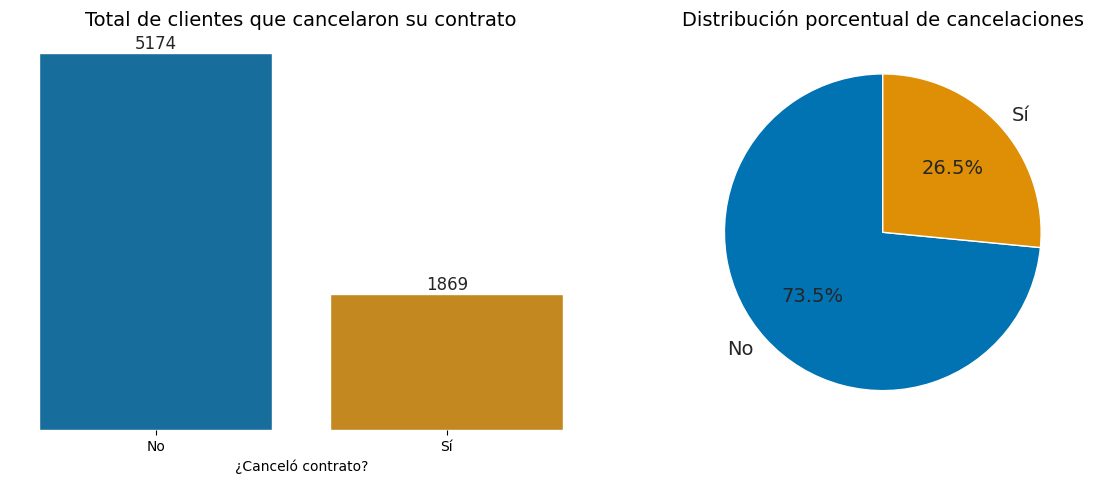

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Contar valores y renombrar
conteo = clientes_normalizado['Churn'].value_counts()
datos = conteo.rename({False: 'No',True: 'Sí'}).reindex(['No', 'Sí'])

# Preparar datos como DataFrame
df_plot = datos.reset_index()
df_plot.columns = ['Churn', 'Total']

# Paleta con solo 2 colores de la paleta colorblind
palette = sns.color_palette("colorblind")[:2]

# Crear figura con 2 subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.set(style="white")

# === Gráfico de barras ===
sns.barplot(data=df_plot, x="Churn", y="Total", hue="Churn", palette=palette, legend=False, ax=ax1)
ax1.set_title("Total de clientes que cancelaron su contrato", fontsize=14)
ax1.set_xlabel("¿Canceló contrato?")
ax1.set_ylabel("")
ax1.set_yticks([])

# Etiquetas arriba de las barras
for i, valor in enumerate(df_plot['Total']):
    ax1.text(i, valor + 5, str(valor), ha='center', va='bottom', fontsize=12)

# Eliminar bordes
sns.despine(left=True, bottom=True, ax=ax1)

# === Gráfico de torta ===
valores = df_plot['Total']
etiquetas = df_plot['Churn']
colores = palette

# Mostrar solo el porcentaje con fuente grande
ax2.pie(
    valores,
    labels=etiquetas,
    colors=colores,
    autopct='%1.1f%%',  # Solo porcentaje, 1 decimal
    startangle=90,
    textprops={'fontsize': 14}  # Tamaño grande del porcentaje
)
ax2.set_title("Distribución porcentual de cancelaciones", fontsize=14)

analisis_evasion_1 = fig  # Guardar figura en variable para reuso

fig.savefig("analisis_evasion_1.png", dpi=300, bbox_inches='tight')  # Guardar como imagen

plt.tight_layout()
plt.show()

#Variables Categóricas

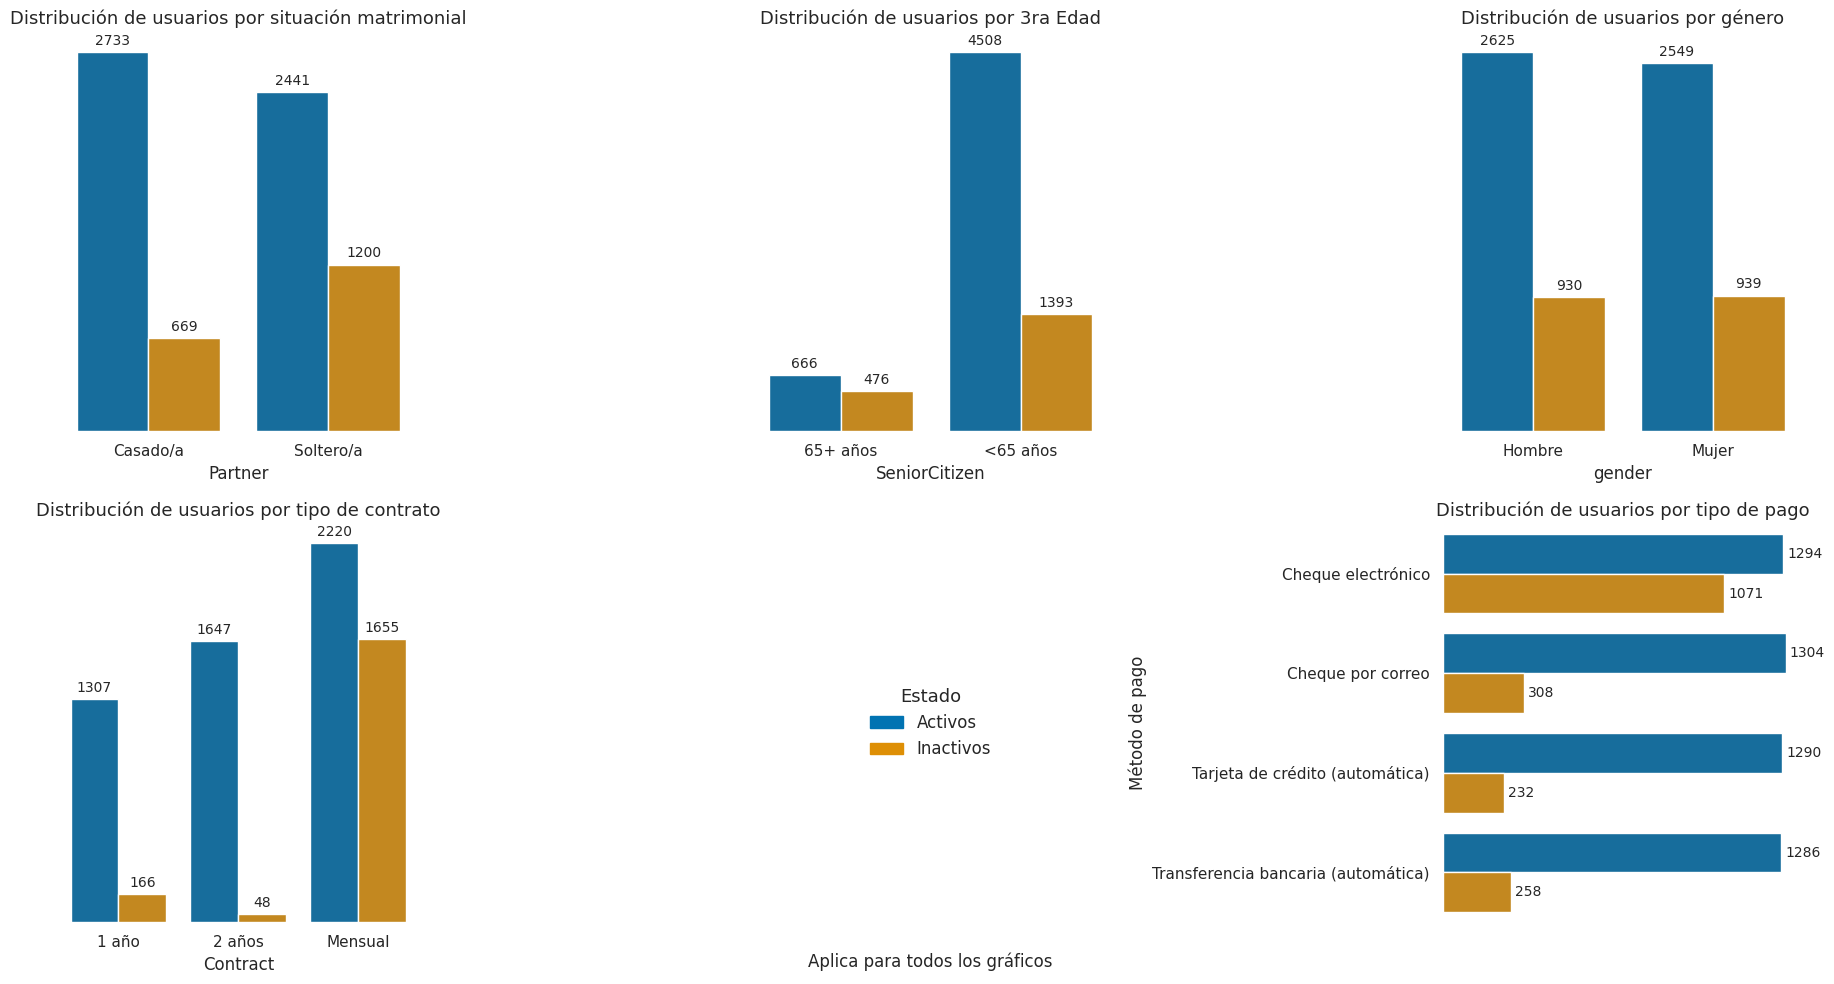

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Paleta de colores (colorblind)
palette = sns.color_palette("colorblind")[:2]
colores_estado = {True: palette[0], False: palette[1]}
etiquetas_estado = {True: "Inactivos", False: "Activos"}

# Copia segura del DataFrame
df = clientes_normalizado.copy()

# Reemplazos
df['gender'] = df['gender'].replace({'Female': 'Mujer', 'Male': 'Hombre'})
df['Partner'] = df['Partner'].replace({True: 'Casado/a', False: 'Soltero/a'})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({True: '65+ años', False: '<65 años'})
df['Contract'] = df['Contract'].replace({
    'One year': '1 año',
    'Month-to-month': 'Mensual',
    'Two year': '2 años'
})
df['PaymentMethod'] = df['PaymentMethod'].replace({
    'Mailed check': 'Cheque por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automática)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})

# Nuevo orden
columnas = ['Partner', 'SeniorCitizen', 'gender', 'Contract', 'PaymentMethod']
titulos = [
    'Distribución de usuarios por situación matrimonial',
    'Distribución de usuarios por 3ra Edad',
    'Distribución de usuarios por género',
    'Distribución de usuarios por tipo de contrato',
    'Distribución de usuarios por tipo de pago'
]

# Figura con 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.set(style="white")

# Mapeo manual de posición
posiciones = {
    0: (0, 0),
    1: (0, 1),
    2: (0, 2),
    3: (1, 0),
    4: (1, 2)
}

for i, (col, titulo) in enumerate(zip(columnas, titulos)):
    row, col_idx = posiciones[i]
    ax = axes[row][col_idx]

    # Datos agrupados
    datos = df.groupby([col, 'Churn']).size().reset_index(name='Total')
    datos['Estado'] = datos['Churn'].map(etiquetas_estado)

    # Gráfico
    if col == 'PaymentMethod':
        sns.barplot(data=datos, x='Total', y=col, hue='Estado', palette=palette, ax=ax)
        ax.set_ylabel("Método de pago")
        ax.set_xlabel("")
    else:
        sns.barplot(data=datos, y='Total', x=col, hue='Estado', palette=palette, ax=ax)
        ax.set_ylabel("")
        ax.set_xlabel(col)

    # Estilo limpio
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(False)
    ax.set_title(titulo, fontsize=13)

    # Ejes limpios
    if col == 'PaymentMethod':
        ax.set_xticks([])
    else:
        ax.set_yticks([])

    # Etiquetas sobre barras
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, padding=3)

    # Quitar leyenda de todos los gráficos
    ax.legend_.remove()

# === Zona central vacía con leyenda global ===
legend_ax = axes[1][1]
legend_ax.axis('off')  # Quitar todo del eje

# Crear leyenda personalizada
from matplotlib.patches import Patch
handles = [
    Patch(color=palette[0], label='Activos'),
    Patch(color=palette[1], label='Inactivos')
]

# Dibujar la leyenda en el espacio central
legend_ax.legend(handles=handles, loc='center', fontsize=12, title="Estado", title_fontsize=13, frameon=False)

# Agregar texto explicativo debajo
legend_ax.text(0.5, -0.1, "Aplica para todos los gráficos", ha='center', va='center', fontsize=12)

analisis_evasion_2 = fig  # Guardar figura en variable para reuso

fig.savefig("analisis_evasion_2.png", dpi=300, bbox_inches='tight')  # Guardar como imagen

plt.tight_layout()
plt.show()

#Variables Numéricas

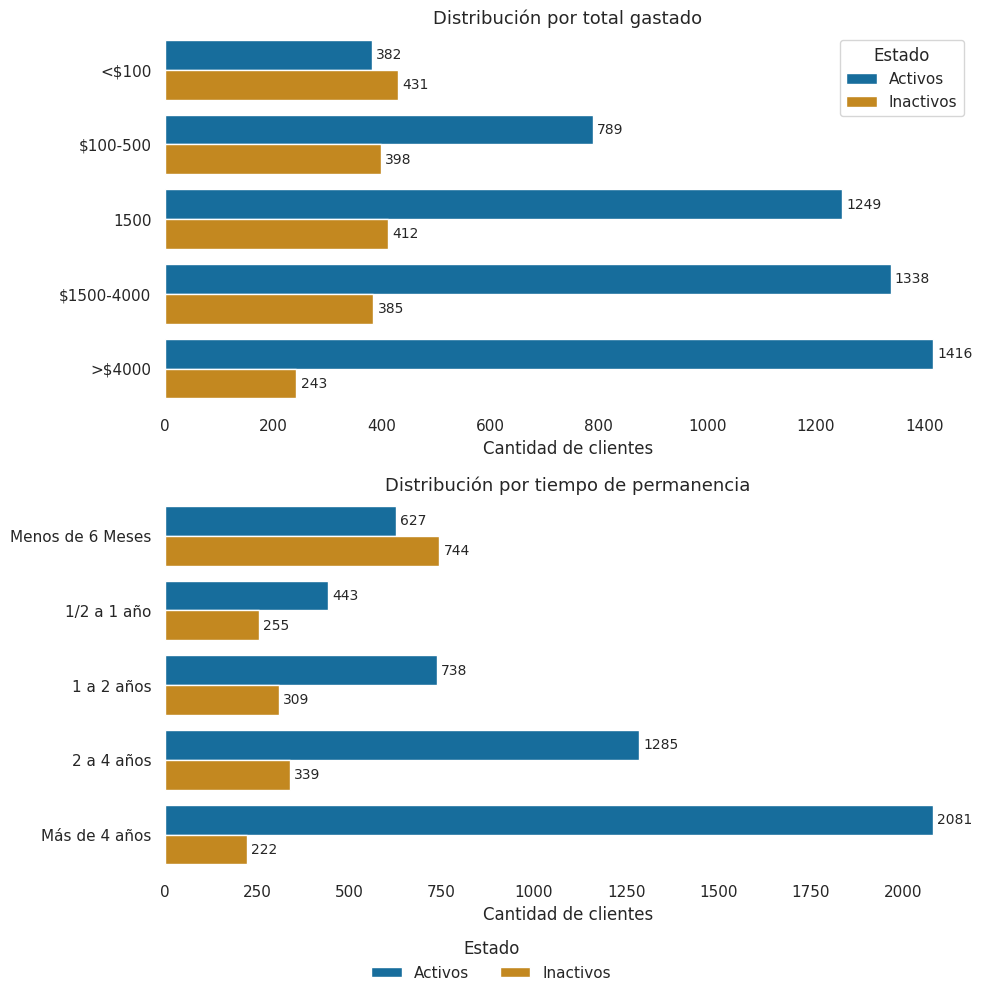

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Copiar DataFrame y definir paleta
df = clientes_normalizado.copy()
palette = sns.color_palette("colorblind")[:2]
estado_labels = {True: "Inactivos", False: "Activos"}

# === Segmentar Charges.Total ===
def segmentar_charges(x):
    if x < 100:
        return "<$100"
    elif 100 <= x < 500:
        return "$100-500"
    elif 500 <= x < 1500:
        return "1500"
    elif 1500 <= x < 4000:
        return "$1500-4000"
    else:
        return ">$4000"

df["Segmento_Cargos"] = df["Charges.Total"].apply(segmentar_charges)

# === Segmentar tenure ===
def segmentar_tenure(x):
    if x < 6:
        return "Menos de 6 Meses"
    elif 6 <= x < 12:
        return "1/2 a 1 año"
    elif 12 <= x < 24:
        return "1 a 2 años"
    elif 24 <= x < 48:
        return "2 a 4 años"
    else:
        return "Más de 4 años"

df["Segmento_Tenure"] = df["tenure"].apply(segmentar_tenure)

# === Agrupar para ambos gráficos ===
df["Estado"] = df["Churn"].map(estado_labels)

# Preparar datos para Charges.Total
charges_grouped = df.groupby(["Segmento_Cargos", "Estado"]).size().reset_index(name="Total")
charges_grouped["Segmento_Cargos"] = pd.Categorical(
    charges_grouped["Segmento_Cargos"],
    categories=["<$100", "$100-500", "1500", "$1500-4000", ">$4000"],
    ordered=True
)

# Preparar datos para tenure
tenure_grouped = df.groupby(["Segmento_Tenure", "Estado"]).size().reset_index(name="Total")
tenure_grouped["Segmento_Tenure"] = pd.Categorical(
    tenure_grouped["Segmento_Tenure"],
    categories=["Menos de 6 Meses", "1/2 a 1 año", "1 a 2 años", "2 a 4 años", "Más de 4 años"],
    ordered=True
)

# === Graficar ===
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.set(style="white")

# Gráfico 1: Charges.Total
sns.barplot(
    data=charges_grouped,
    y="Segmento_Cargos",
    x="Total",
    hue="Estado",
    palette=palette,
    ax=axes[0]
)
axes[0].set_title("Distribución por total gastado", fontsize=13)
axes[0].set_xlabel("Cantidad de clientes")
axes[0].set_ylabel("")
axes[0].grid(False)
sns.despine(ax=axes[0], left=True, bottom=True)

for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=10, padding=3)

# Gráfico 2: tenure
sns.barplot(
    data=tenure_grouped,
    y="Segmento_Tenure",
    x="Total",
    hue="Estado",
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("Distribución por tiempo de permanencia", fontsize=13)
axes[1].set_xlabel("Cantidad de clientes")
axes[1].set_ylabel("")
axes[1].grid(False)
sns.despine(ax=axes[1], left=True, bottom=True)

for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=10, padding=3)

# Eliminar leyendas duplicadas
axes[1].legend_.remove()

# Colocar una única leyenda en la parte inferior
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, frameon=False, title="Estado")

analisis_evasion_3 = fig  # Guardar figura en variable para reuso

fig.savefig("analisis_evasion_3.png", dpi=300, bbox_inches='tight')  # Guardar como imagen

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


##Informe final

# Introducción
El objetivo de este desafío es asistir a la empresa ficticia Telecom X a comprender los factores detras de su alta tasa de cancelaciones y perdida de clientes.

# Limpieza y Tratamiento de Datos
## Extraccion

Los datos son extraidos directamente de GitHub en formato JSON y cargados como dataframe usando pandas.
Las columnas [customer, phone, internet, account] del dataframe son de tipo JSON, por lo que las columnas se normalizan.
Se crea el dataframe normalizado el cual es una copia del dataframe original donde se eliminan las columnas que contienen JSON y se agregan las columnas normalizados.

## Transformación

El dataframe normalizado contiene 21 columnas, pero la mayoria son del tipo object, por lo que se van a formatear.
La columna Charges.Total se formatea a float.
Varias columnas se formatean como booleanos, pero algunas de estas arrojan excepciones al tener mas de 2 resultados unicos, por lo que se proceden a corregir estos errores.
Es posible convertir los resultados adicionales a un formato booleano gracias al contexto, por lo que las columnas con errores quedan formateadas correctamente a booleano.
Sin embargo los valores vacios de la columna Churn son removidos, debido a que no aportan a nuestro analisis de evasión.

Finalmente se formatean las columnas restantes a formato String.
Se crea la columna Charges.Daily al dividir la columna Charges.Monthly en 30.44.

# Análisis Exploratorio de Datos
## Análisis Numérico

In [ ]:

clientes_normalizado.describe(include=[np.number])

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.127521
std,24.559481,30.090047,2266.771362,0.988435
min,0.000000,18.250000,18.800000,0.600000
25%,9.000000,35.500000,401.450000,1.170000
50%,29.000000,70.350000,1397.475000,2.310000
75%,55.000000,89.850000,3794.737500,2.950000
max,72.000000,118.750000,8684.800000,3.900000


El análisis numerico nos muestra que la columna Charges.Total no considera 11 elementos debido a que son valores vacios, sin embargo esto no afecta al analisis.

Los usuarios promedio de Telecom X llevan 32 meses pagando una suscripcion de
2.12 y alcanzando un total de $ 2283.30
Las desviaciones estandar nos muestran que estos usuarios promedios pueden llegar a tener variaciones de 2 años de actividad, y variaciones en los precios mensuales de
0.9 y totales de $2266.77

Los cuartiles nos muestran que 1/4 de los clientes llevan menos de 9 meses y otro cuarto llevan mas de 55 meses.
En particular muchos clientes han mantenido una retencion alta en la empresa entregando un significante ingreso a esta misma.



#Analisís categórico

In [ ]:

clientes_normalizado.describe(include=["string", "bool"])

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,0011-IGKFF,False,Male,False,False,False,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check
freq,1,5174,3555,5901,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365


El analisis categorico nos muestra que la columna customerID no tiene duplicados.

De un total de 7043 clientes 5174 son activos y 1869 inactivos.
La mayoria de los clientes son masculinos o solteros o menores a 65 años.
El servicio telefonico es el unico servicio que es contratado por la mayoria de usuarios, el resto de los servicios son contratados por una pequeña fraccion de usuarios.
Los usuarios que contrataron servicios de internet, prefieren en su mayoria la fibra optica.
Los usuarios prefieren los contratos de mes a mes y las facturas a papel.
Los usuarios prefieren pagar con cheques electronicos.

# Análisis de Evasión

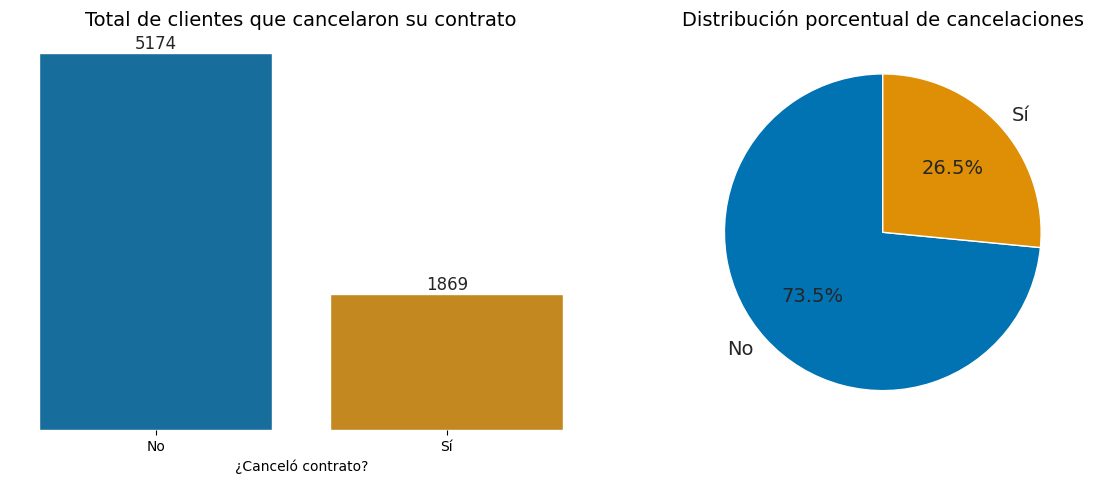

In [ ]:
from IPython.display import display
display(analisis_evasion_1)

Se puede observar que mas de 1/4 de los clientes cancelaron su contrato.

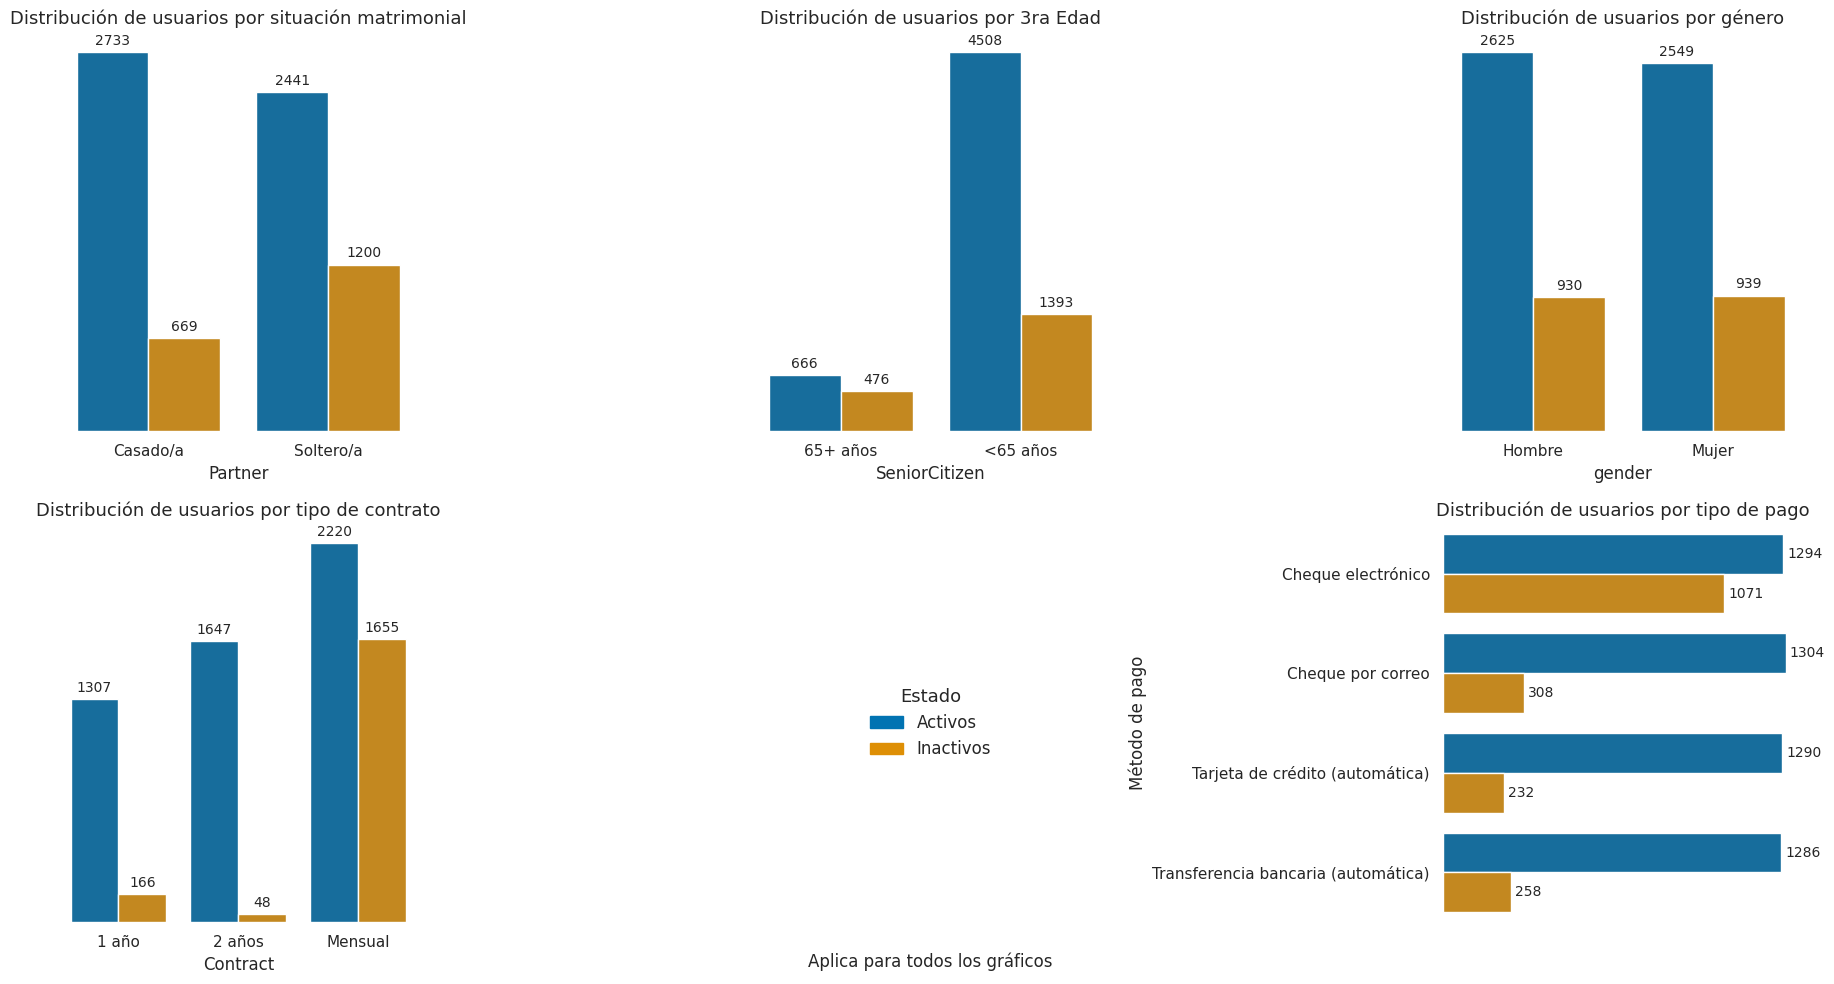

In [ ]:
from IPython.display import display
display(analisis_evasion_2)

Los usuarios solteros son mas probables a cancelar su suscripcion vs a usuarios casados.
Aunque son pocos los usuarios sobre la tercera edad, muchos en su mayoria cancelan sus contratos, con una proporcion distinta a la del resto de los usuarios.
La distribucion de usuarios por genero es casi igual por lo que es posible descartar esta razon como causa del abandono.
Es posible ver que la mayoria de los usuarios que abandonaron la empresa tenian contratos mensuales.
Ademas la proporcion nos muestra que los usuarios que pagan con cheque electronico tienen mas tendencia a desertar.

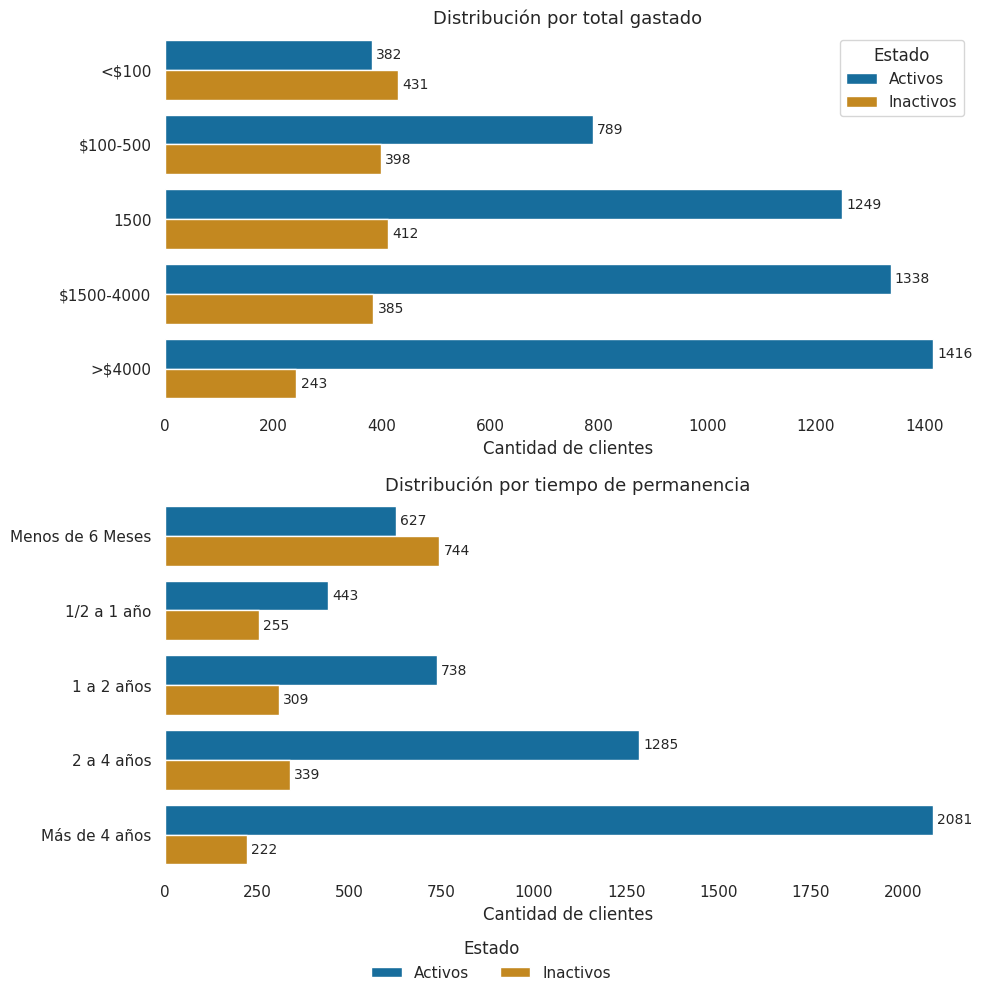

In [ ]:

from IPython.display import display
display(analisis_evasion_3)

Es posible ver una proporcion parecida en el estado de los usuarios por el total gastado, donde siempre hay un numero cercano a 400 usuarios inactivos por rango, sin embargo los usuarios que cancelaron en total menos de
4000 tienen la proporcion mas baja de inactivos vs activos.
Nuevamente es posible ver que la proporcion de usuarios inactivos es parecida por rango, sin embargo los usuarios con menos de 6 meses en la empresa son en su mayoria inactivos.

# Conclusiones e Insights
## Acerca del usuario promedio de Telecom X.

En general se puede apreciar que los clientes en Telecom X, poseen una retencion bastante saludable y aquellos usuarios de manera constante y por un tiempo promedio saludable

Estamos hablando de un promedio de 32 meses que el usuario se queda en la empresa, pagando un plan mensual de
2283 invertido.

Lo mas contratado por estos usuarios son los planes telefonicos, prefiriendo contratos mensuales.

## Acerca del usuario evasor de Telecom X.

El perfil de un usuario que no es retenido por Telecom X, es aquel que prefiere los contratos mensuales y paga con cheque electronico, aquel usuario que lleva menos de 6 meses contratando servicios.

Estos son los usuarios mas propensos a abandonar Telecom X,

Recomendaciones
Se ha demostrado que los usuarios que llevan mas de 6 meses en Telecom o no pagan con cheque electronico, son menos propensos a abandonar la empresa, por lo que se pueden realizar 2 estrategias para fomentar la retencion.

Ofrecer contratos de 1/2 año

Este tipo de contratos es clave para la retencion de usuarios antiguos y nuevos, ademas que una nueva opcion mejoraria significantemente el alcance de usuarios nuevos.

Para evitar que este contrato afecte a los otros de forma perjudicial, podria ser aplicado 1 sola vez para los clientes, de esta forma al terminar el plazo podria incentivar la toma de contratos mas extensos.

Sin embargo es importante considerar como ese contrato sera aplicado a los usuarios antiguos, y observar como los nuevos usuarios adoptan/abandonan este contrato en un análisis posterior.

Evaluar los pagos con cheque electrónico

Es importante realizar encuestas a los usuarios para observar cuales son los problemas que tienen con los cheques electronicos, la idea es investigar a mayor detalle la razon detras del abandono de usuarios con este tipo de pago.

De esta forma se puede mejorar el soporte a usuarios que adoptan este tipo de pago y buscar formas de incentivarlos.